<a href="https://colab.research.google.com/github/crzysab/CoffeShop-SMDB/blob/main/Sklearn04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression dengan Scikit-Learn**

___

Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus

Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Sample Dataset

In [2]:
pizza = {'diameter' : [6, 8, 10, 14,18],
         'harga' : [7, 9, 13, 17.5, 18]}

#diameter berperan sebagai feature
#harga berperan sebagai target

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Visualisasi Dataset

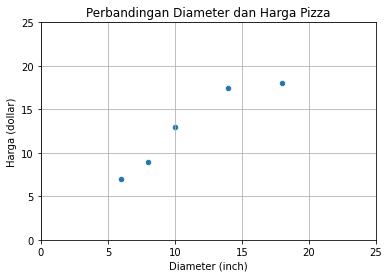

In [3]:
pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


Penyesuaian Dataset

In [5]:
X = np.array(pizza_df['diameter']) #feature
y = np.array(pizza_df['harga']) #target

print(f'X : {X}')
print(f'y : {y}')

X : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 18. ]


In [9]:
#sklearn membutuhkan data feature berupa array dua dimensi
X = X.reshape(-1,1)
X.shape

(5, 1)

In [7]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

Training Simple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualisasi Simple Linear Regression

In [10]:
X_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(X_vis)

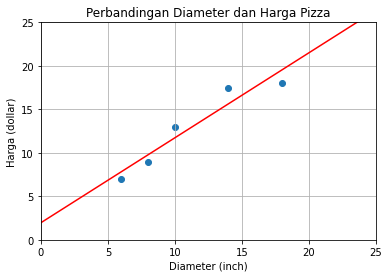

In [11]:
plt.scatter(X,y)
plt.plot(X_vis, y_vis, '-r')
plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


In [12]:
#intercept : ketika garis menambrak satu titik di sumbu y atau ketika x=0
#slope : berpengaruh pada tingkat kemiringan garis

print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 1.965517241379315
slope : [0.9762931]


Mencari Nilai Slope

In [13]:
print(f'X : \n {X} \n')
print(f'X flatten : {X.flatten()}\n')
print(f'y : {y}')

X : 
 [[ 6]
 [ 8]
 [10]
 [14]
 [18]] 

X flatten : [ 6  8 10 14 18]

y : [ 7.   9.  13.  17.5 18. ]


Variance

In [15]:
variance_x = np.var(X.flatten(), ddof=1)
#ddof : degree of freedom
print(f'variance : {variance_x}')

variance : 23.2


Covariance

In [16]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [18]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance : {covariance_xy}')

covariance : 22.650000000000002


Slope

In [19]:
slope = covariance_xy / variance_x
print(f'slope : {slope}')

slope : 0.976293103448276


Mencari Nilai Intercept

In [21]:
#nilai intercept dapat diperoleh dari selisih nilai rata-rata target dengan hasil perkalian antara slope dan nilai rata-rata feature
intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept : {intercept}')

intercept : 1.9655172413793096


Prediksi Harga Pizza

In [23]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [24]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [27]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga) :
  print(f'Diameter : {dmtr} prediksi harga : {hrg}')

Diameter : [12] prediksi harga : 13.681034482758621
Diameter : [20] prediksi harga : 21.491379310344826
Diameter : [23] prediksi harga : 24.42025862068965
